In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [110]:
pca = PCA(svd_solver='auto')

In [111]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4b/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4b/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

6
7
8


In [112]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.979,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,7,1.000000,0,0,,0,,0.333333,CONTRADICTION
1,0.383998,2.918488,2.095,1.626,3.680084,0.006208,0.291945,3,0.333333,0,...,2,6,0.166667,0,0,,0,,0.250000,CONTRADICTION
2,0.230136,1.439472,1.893,0.722,3.797839,0.005888,0.233930,1,0.200000,0,...,1,5,0.500000,1,0,,0,,0.500000,CONTRADICTION
3,0.608662,5.492168,2.499,2.522,3.627378,0.005717,0.309758,1,1.333333,0,...,4,3,0.000000,0,0,,0,,0.000000,CONTRADICTION
4,0.000000,0.000000,2.075,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,6,1.000000,0,0,,0,,1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.407950,4.203100,2.189,2.189,3.754545,0.005241,0.198049,0,0.750000,0,...,3,4,0.666667,0,0,,0,,0.000000,CONTRADICTION
491,0.000000,0.000000,2.189,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,4,0.666667,0,0,,0,,0.666667,CONTRADICTION
492,0.110265,5.734751,0.980,0.980,3.783412,0.006133,0.098616,0,1.333333,0,...,4,3,0.000000,0,0,,0,,0.000000,CONTRADICTION
493,-0.073513,1.481677,0.868,0.811,3.741673,0.004359,0.047867,2,0.250000,0,...,1,4,0.250000,1,0,,0,,0.000000,CONTRADICTION


In [113]:
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.979,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,7,1.000000,0,0,0,0.333333,CONTRADICTION
1,0.383998,2.918488,2.095,1.626,3.680084,0.006208,0.291945,3,0.333333,0,6,2,6,0.166667,0,0,0,0.250000,CONTRADICTION
2,0.230136,1.439472,1.893,0.722,3.797839,0.005888,0.233930,1,0.200000,0,6,1,5,0.500000,1,0,0,0.500000,CONTRADICTION
3,0.608662,5.492168,2.499,2.522,3.627378,0.005717,0.309758,1,1.333333,0,5,4,3,0.000000,0,0,0,0.000000,CONTRADICTION
4,0.000000,0.000000,2.075,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,6,1.000000,0,0,0,1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.407950,4.203100,2.189,2.189,3.754545,0.005241,0.198049,0,0.750000,0,3,3,4,0.666667,0,0,0,0.000000,CONTRADICTION
491,0.000000,0.000000,2.189,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,4,0.666667,0,0,0,0.666667,CONTRADICTION
492,0.110265,5.734751,0.980,0.980,3.783412,0.006133,0.098616,0,1.333333,0,4,4,3,0.000000,0,0,0,0.000000,CONTRADICTION
493,-0.073513,1.481677,0.868,0.811,3.741673,0.004359,0.047867,2,0.250000,0,4,1,4,0.250000,1,0,0,0.000000,CONTRADICTION


In [114]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [115]:
# RTE3
y_t=[]
for i in y_:
    if i == "YES":
        y_t.append(1)
    elif i == "UNKNOWN":
        y_t.append(2)
    else:
        y_t.append(0)

In [116]:
# scaler = preprocessing.MaxAbsScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled

In [117]:
y_.unique()

array(['CONTRADICTION', 'ENTAILMENT'], dtype=object)

In [118]:
Y_pca = pca.fit_transform(X)

In [119]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[4.91654483e-01 3.22548799e-01 7.97573816e-02 4.05600190e-02
 2.84363897e-02 9.84058875e-03 9.10120982e-03 5.34300775e-03
 3.67985939e-03 2.41690926e-03 2.00366018e-03 1.43340834e-03
 1.33104425e-03 1.16791332e-03 5.46935776e-04 1.57644921e-04
 2.05741195e-05 1.71871620e-07]


In [120]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

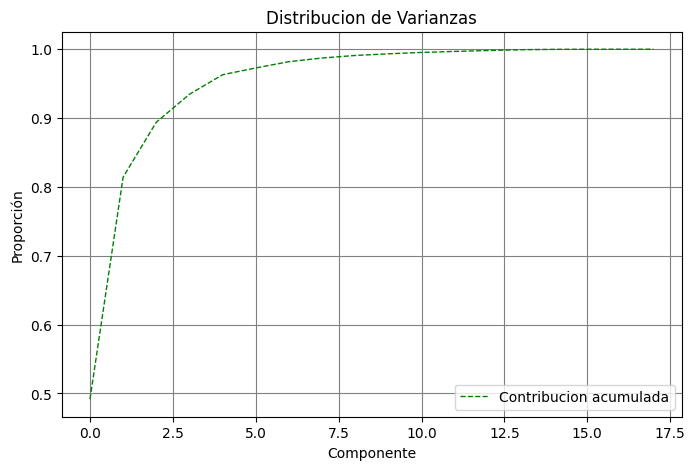

In [121]:
distribucion_vr(pca_vr)

In [88]:
pca_clases = PCA(n_components=2)

In [89]:
principalComponents=pca_clases.fit_transform(X)

In [90]:
principalComponents

array([[ 5.17244678, -3.89429734],
       [ 5.19983811, -3.19901335],
       [ 2.18548223,  0.59658558],
       ...,
       [-2.82233405, -3.94831015],
       [ 0.20925592, -3.27516784],
       [ 2.18058996,  0.47935055]])

In [91]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

# PCA vs LDA

In [99]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [100]:
len(y_)

800

In [101]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_).transform(X)

In [102]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.8177352  0.10941363]


In [103]:
len(X_r)

800

In [104]:
len(X_r[y_ == i, 0])

412

<Figure size 640x480 with 0 Axes>

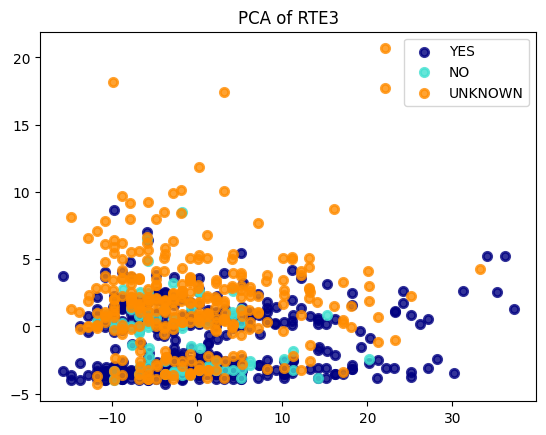

<Figure size 640x480 with 0 Axes>

In [105]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r[y_ == i, 0], X_r[y_ == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of RTE3")

plt.figure()

ValueError: x and y must be the same size

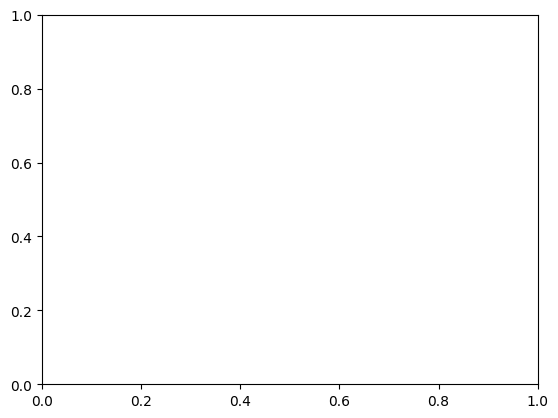

In [106]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r, y_t,color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of RTE3")

plt.figure()

Text(0.5, 1.0, 'LDA of RTE3')

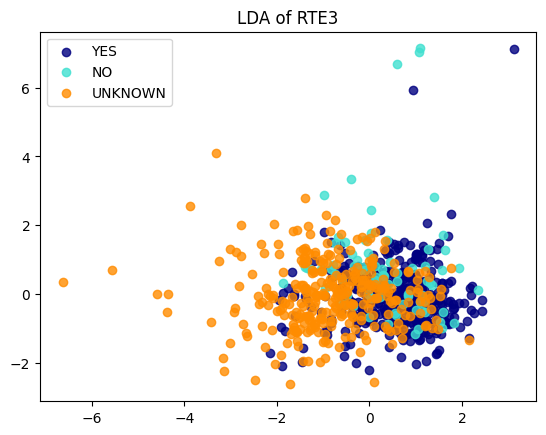

In [107]:
plt.figure()
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r2[y_ == i, 0], X_r2[y_ == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of RTE3")

# Proyection 3d

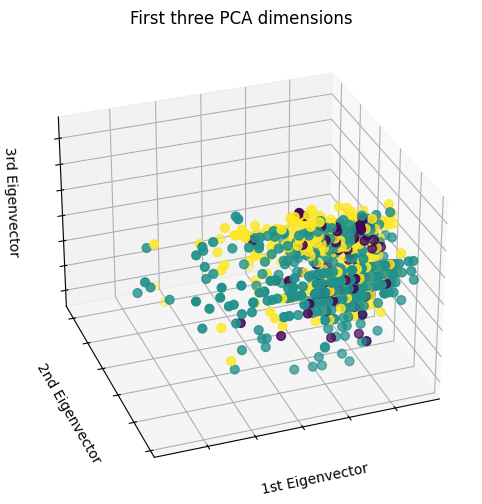

In [108]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_t,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()